Wczytanie zbioru danych MNIST z pikselami obrazków liczb.

In [90]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [91]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [92]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


In [93]:
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [94]:
X_train.shape

(60000, 784)

In [95]:
y_train.shape

(60000,)

In [96]:
X_test.shape

(10000, 784)

In [97]:
y_test.shape

(10000,)

-------------------------
## PCA
PCA służy do:
* redukcji wymiarowości danych (np. z 100 zmiennych do 2–3),
* przy jednoczesnym zachowaniu jak największej ilości informacji (wariancji).

In [98]:
from sklearn.decomposition import PCA

**n_components** - parametr mówiący o wymiarze do którego redukujemy dane:
* wartość całkowita - mówi o wymiarze do którego chcemy zredukować dane,
* wartość od 0 do 1 - mówi o poziomie wyjaśnienia wariancji jaki ma zrobić PCA, algorytm sam dobiera wielkość wymiaru,
* brak zdefiniowania - algorytm PCA bez redukcji wymiarowośći.

In [99]:
pca = PCA(n_components=0.9) #n_components może być jeszcze podany jako wartość od 0 do 1 (poziom wyjaśnienia wariancji)
pca

,n_components,0.9
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [100]:
X_train_pca = pca.fit_transform(X_train)
pca

,n_components,0.9
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


Mamy 87 zmiennych czyli 87 wymiarów zamiast 784.

In [101]:
pca.explained_variance_.shape

(87,)

In [102]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

In [103]:
pca.explained_variance_ratio_.sum() #redukowaliśmy do poziomu 90% wyjaśnienia wariancji - zgadza się

np.float64(0.9001062226425088)

---------------------------
## **OCENA JAKOŚCI PCA**

W PCA szukamy kierunków (wektorów własnych) o największej wariancji danych.

Można to zobaczyć jak gumową siatkę naciąganą przez macierz (w przypadku PCA mówimy o macierzy kowariancji):
* większość punktów siatki zmienia pozycję i kierunek,
* ale niektóre linie (osi wektorów własnych) tylko się rozciągają lub ściskają — nie wyginają się.

Na podstawie danych tworzona jest w pierwszej kolejności macierz kowariancji, która opisuje, jak silnie cechy są ze sobą skorelowane. Następnie wyznaczane są wartości własne oraz wektory własne macierzy kowariancji.
* Wektory własne $v_i$  → kierunki w przestrzeni danych, w których wariancja (rozrzut danych) jest największa, kierunek największej zmienności.
* Wartości własne $\lambda_i$ → miary tego, ile tej wariancji przypada na dany kierunek, „siła” tej zmienności (rozrzutu) w tym kierunku.

Następnie wybierane są najważniejsze wartości własne, zależne od poziomu redukcji jaki chcemy przeprowadzić - wybieraje są od największej wartości własnej, bo wartość własna mówi o poziomie wariancji.
$\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_n$  
Odpowiadające im wektory własne tworzą nowe osie układu współrzędnych — tzw. **główne składowe**.

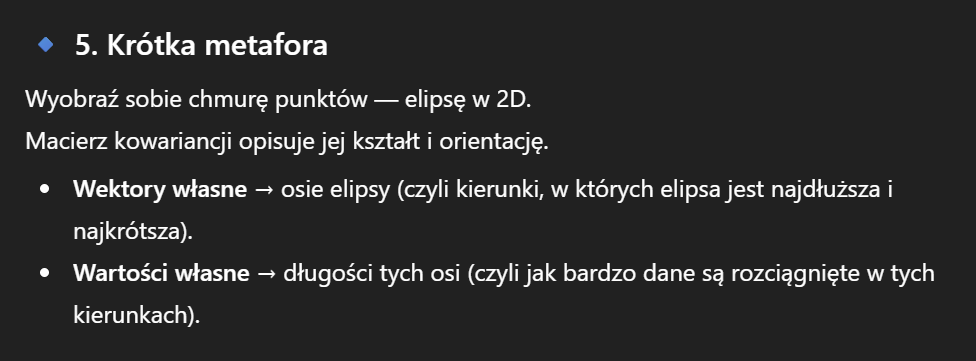

### **Explained Variance Ratio (Wariancja wyjaśniona)**

Najpopularniejsza metoda oceny PCA - każdy komponent ma swoją wyjaśnioną wariancję. Suma wyjaśnionej wariancji dla wszystkich komponentów = 1 (100%).


**Wartość własna $lambda_i$ mówi, ile wariancji danych leży wzdłuż wektora własnego $v_i$, służy do obliczania procentu zachowanej informacji (exolained variabce ratio).**

$$Explained\ Variance\ Ratio_i = \frac{Wariancja\ zachowana\ w\ komponencie}{Całowita\ wariancja\ danych} = \frac{\lambda_i}{\sum_{j=1}\lambda_j}$$

In [104]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

In [105]:
print("Suma wyjaśnionej wariancji:", pca.explained_variance_ratio_.sum())

Suma wyjaśnionej wariancji: 0.9001062226425088


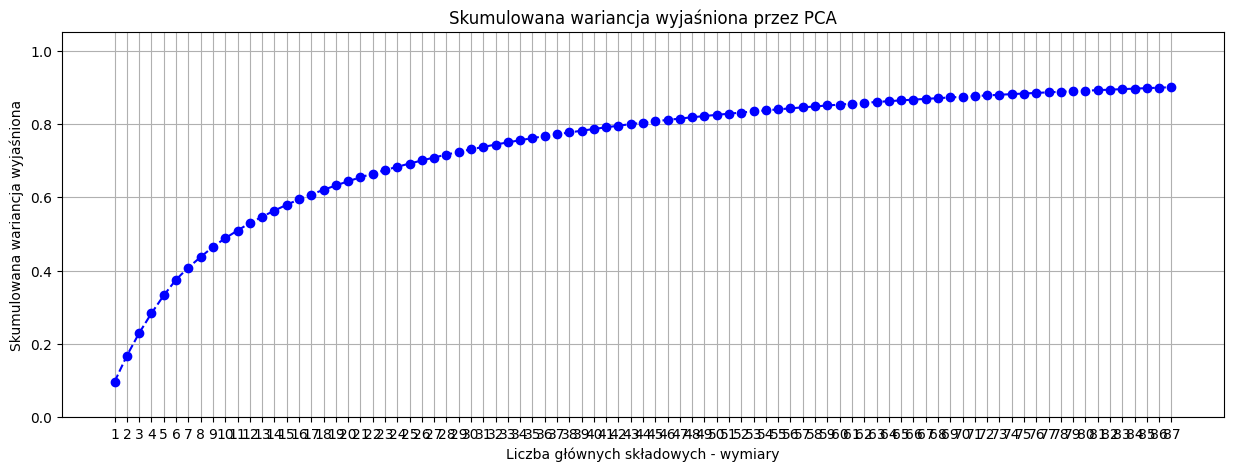

In [106]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba głównych składowych - wymiary')
plt.ylabel('Skumulowana wariancja wyjaśniona')
plt.title('Skumulowana wariancja wyjaśniona przez PCA')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.ylim(0,1.05)
plt.grid(True)
plt.show()

### **Rekonstrukcja danych (Reconstruction Error)**
Inny sposób: sprawdzenie jak dobrze można odtworzyć oryginalne dane z komponentów PCA. PCA redukuje wymiary danych, zachowując maksymalną możliwą wariancję w ograniczonej liczbie komponentów.

* Po redukcji mamy zbiór danych X po PCA (na naszym przykładzie jest to X_train_pca).
* Możemy spróbować odtworzyć dane w oryginalnej przestrzeni.
* **RECONSTRUCTION ERROR** to różnica między oryginalnymi danymi (X_train), a danymi odtworzonymi (X_reconstructed). Żeby wyznaczyć ten błąd zwykle liczymy Mean Squared Error (MSE).

Interpretacja: mniejszy błąd → PCA lepiej zachowuje strukturę danych

In [107]:
X_reconstructed = pca.inverse_transform(X_train_pca)
mse = np.mean((X_train - X_reconstructed)**2)
print("Reconstruction MSE:", mse)

Reconstruction MSE: 436.83719996615395


### **WIZUALIZACJA**

Wizualizacja to bardzo praktyczny i intuicyjny sposób oceny jakości PCA, zwłaszcza gdy redukujemy dane do 2–3 wymiarów. Pozwala zobaczyć strukturę danych „oczami”, co czasami mówi więcej niż liczby.

1. Ocena separacji klas lub klastrów
* Jeśli masz etykiety klas, możesz zobaczyć, czy PCA uwydatnia różnice między klasami.
* Punkty z różnych klas powinny tworzyć odrębne grupy w przestrzeni komponentów.

2. Ocena skupienia danych
* Nawet bez etykiet można zobaczyć naturalną strukturę: czy dane grupują się w klastry, czy są rozproszone.

3. Weryfikacja redukcji wymiarów
* Czy 2–3 komponenty wystarczą do uchwycenia głównej struktury danych?
* Jeśli po redukcji dane wciąż są „rozlane” lub mieszają się, PCA mogło utracić ważne informacje.

In [108]:
#PCA redukcja do 2 wymiarów
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
pca_2.explained_variance_ratio_

array([0.09704664, 0.07095924])

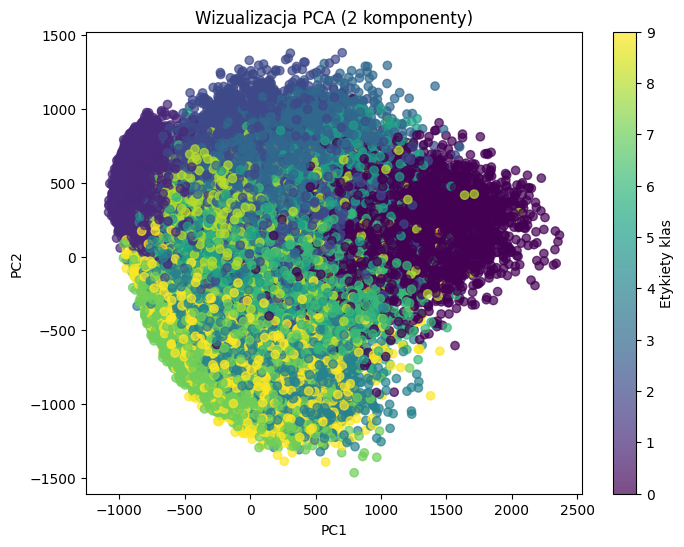

In [109]:
#wykres po reducji do 2 wymiarów z oznaczeniem 10ciu etykiet
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_2[:,0], X_train_pca_2[:,1], c=y_train.astype(int), cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wizualizacja PCA (2 komponenty)')
plt.colorbar(label='Etykiety klas')
plt.show()


In [110]:
#redukcja do 3 wymiarów
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)
pca_3.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089])

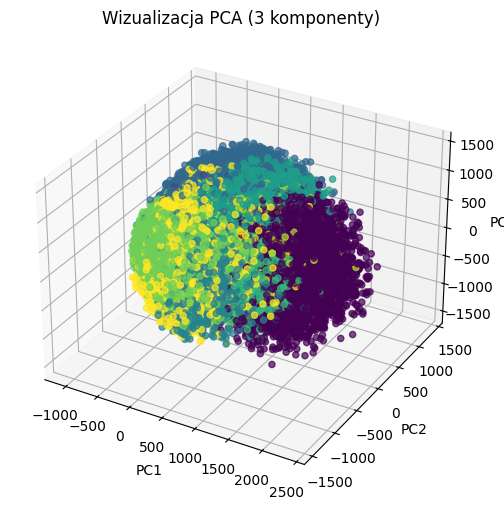

In [111]:
#wykres po redukcji do 3 wymiarów z oznaczeniem 10ciu etykiet
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca_3[:,0], X_train_pca_3[:,1], X_train_pca_3[:,2], c=y_train.astype(int), cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Wizualizacja PCA (3 komponenty)')
plt.show()


PODSUMOWANIE

| Metoda                   | Co mierzy                                      | Wskazówka                       |
| ------------------------ | ---------------------------------------------- | ------------------------------- |
| Explained Variance Ratio | Ile wariancji zachowuje każdy komponent        | Cel: >90% sumarycznej wariancji |
| Reconstruction Error     | Jak dobrze da się odtworzyć oryginalne dane    | Im mniejszy, tym lepiej         |
| Wizualizacja             | Czy dane są lepiej rozdzielone w 2-3 wymiarach | Subiektywna, ale pomocna        |


----------
## **OCENA JAKOŚCI KLASTERYZJACJI**

### Davies–Bouldin Index

$$DB = \frac{1}{k}\sum_{i=1}^{k}max_{i\neq j}\frac{S_i + S_j}{M_{ij}} $$
* $k$ - liczba klastrów,
* $S_i$ - średnia odległość punktów w klastrze $𝑖$ od jego centroidu (czyli miara rozrzutu klastra, np. wariancja wewnętrzna),
* $M_{ij}$ - odległość między centroidami klastrów $i$ i $j$.

🔍 Intuicja

Dobry podział na klastry powinien mieć:

* małą rozrzutność w obrębie klastra (mały promień) → punkty w klastrze są do siebie podobne,
* duże odległości między klastrami (duży dystans między centroidami) → klastry są od siebie dobrze odseparowane.

Indeks Daviesa–Bouldina łączy te dwie miary.

📉 Interpretacja

Im mniejszy DBI, tym lepiej.

* Mały DBI ⇒ klastry są zwarte i dobrze od siebie oddzielone.
* Duży DBI ⇒ klastry nakładają się, mają dużą rozrzutność.

In [112]:
#przeprowadzamy klasteryzację
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [113]:
kmeans.labels_

array([2, 2, 0, ..., 0, 2, 1], shape=(60000,), dtype=int32)

In [114]:
#wyznaczamy indeks DB
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_train, kmeans.labels_)
db_index

3.291851175365856

-------------
## Jak stosować miary klasteryzacji z PCA?

In [115]:
#chcę klasteryzować do 10 klastrów
kmeans_10 = KMeans(n_clusters=10)
clusters_10 = kmeans_10.fit(X_train)
davies_bouldin_score(X_train, clusters_10.labels_)

2.8718932229130876

In [116]:
#chcę klasteryzować do 10 klastrów ale na danych zredukowanych przez PCA n_components = 0.9 (wyszło 87 wymiarów)
kmeans_pca_10 = KMeans(n_clusters=10)
clusters_pca_10 = kmeans_pca_10.fit(X_train_pca)
davies_bouldin_score(X_train_pca, clusters_pca_10.labels_)

2.6390654376574654

Ewaluacja na danych TESTOWYCH.
* KMeans - predict nie liczy KMeans od początku. Zamiast tego używa centroidów wyliczonych na danych treningowych i przypisuje każdy punkt testowy do najbliższego centroidu.
* PCA - transform używa tych samych wektorów głównych wyliczonych z train, dzięki czemu test jest przenoszony do tej samej przestrzeni PCA co trening.

In [117]:
davies_bouldin_score(X_test, kmeans_10.predict(X_test))

2.837605337652068

In [118]:
X_test_pca = pca.transform(X_test)
davies_bouldin_score(X_test_pca, kmeans_pca_10.predict(X_test_pca))

2.6625888650182254